# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Bonani-Hazel-Mkhari/Regression_Sprint_2307ACDS_Team-_EG1_1/main/df_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Bonani-Hazel-Mkhari/Regression_Sprint_2307ACDS_Team-_EG1_1/main/df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Data Stucture

In [4]:
df_train#.tail()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0              0  2015-01-01 03:00:00           0.666667           level_5   
1              1  2015-01-01 06:00:00           0.333333          level_10   
2              2  2015-01-01 09:00:00           1.000000           level_9   
3              3  2015-01-01 12:00:00           1.000000           level_8   
4              4  2015-01-01 15:00:00           1.000000           level_7   
...          ...                  ...                ...               ...   
8758        8758  2017-12-31 09:00:00           1.000000           level_6   
8759        8759  2017-12-31 12:00:00           5.000000           level_6   
8760        8760  2017-12-31 15:00:00           6.333333           level_9   
8761        8761  2017-12-31 18:00:00           7.333333           level_8   
8762        8762  2017-12-31 21:00:00           4.333333           level_9   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0                0.0             0.666667         74.333333        64.000000   
1                0.0             1.666667         78.333333        64.666667   
2                0.0             1.000000         71.333333        64.333333   
3                0.0             1.000000         65.333333        56.333333   
4                0.0             1.000000         59.000000        57.000000   
...              ...                  ...               ...              ...   
8758             0.0             2.666667         89.000000        95.666667   
8759             0.0             2.000000         82.000000        85.000000   
8760             0.4             7.333333         67.666667        71.000000   
8761             0.2             7.333333         67.666667        79.000000   
8762             0.0             7.000000         78.666667        68.666667   

      Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  \
0              0.000000           1.000000  ...       265.938000   
1              0.000000           1.000000  ...       266.386667   
2              0.000000           1.000000  ...       272.708667   
3              0.000000           1.000000  ...       281.895219   
4              2.000000           0.333333  ...       280.678437   
...                 ...                ...  ...              ...   
8758          56.666667           4.333333  ...       280.816667   
8759          26.666667           8.000000  ...       283.483333   
8760          63.333333           8.333333  ...       285.150000   
8761          63.333333           2.666667  ...       283.483333   
8762          20.000000           1.666667  ...       282.150000   

      Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
0         281.013000       269.338615   269.338615          281.013000   
1         280.561667       270.376000   270.376000          280.561667   
2         281.583667       275.027229   275.027229          281.583667   
3         283.434104       281.135063   281.135063          283.434104   
4         284.213167       282.252063   282.252063          284.213167   
...              ...              ...          ...                 ...   
8758      281.276667       285.150000   287.573333          280.483333   
8759      287.483333       286.483333   288.616667          287.150000   
8760      289.816667       283.816667   285.330000          289.150000   
8761      287.523333       278.816667   281.410000          286.816667   
8762      287.483333       276.816667   281.020000          287.150000   

      Bilbao_temp_max  Seville_temp_min Madrid_temp  Madrid_temp_min  \
0          269.338615        274.254667  265.938000       265.938000   
1          270.376000        274.945000  266.386667       266.386667   
2          275.027229        278.792000  272.708667       272.708667   
3          281.135063        285.394000  281.895219       281.895219   
4          282.252063        285.513719  2

In [5]:
df_train.shape

(8763, 49)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

| Cities    | Wind Speed| Wind Degrees| Rain 1hr | Rain 3hr| Humidity | Cloud Coverage | Temp Min | Temp Max | Temp | Pressure | Snow 3hr | Weather ID |
|-----------|--------------|------------|----------|------|----------|----------------|----------|----------|------|----------|----------|------------|
| Barcelona |    x         |x|    x      |   x   |          |                |    x      |    x      |  x   |    x     |          |     x      |
| Bilbao    |    x         |    x       |    x     |      |    x     |       x        |    x      |    x      |  x   |    x     |    x     |     x      |
| Madrid    |    x        |            |    x     |      |    x     |       x        |    x      |    x      |  x   |    x     |          |     x      |
| Seville   |    x         |            |    x     |   x   |    x     |       x        |    x      |    x      |  x   |    x     |          |     x      |
| Valencia  |    x         |    x       |          |      |    x     |                |    x      |    x      |  x   |    x     |    x     |            |


### 3.2 Data Statistics

In [7]:
#Sort coloumns alphabetically
df_sorted = df_train.sort_index(axis=1)

# Data statistics
df_central_tendency = df_sorted.describe()
df_central_tendency

Barcelona_pressure  Barcelona_rain_1h  Barcelona_rain_3h  \
count        8.763000e+03        8763.000000        8763.000000   
mean         1.377965e+03           0.128906           0.000439   
std          1.407314e+04           0.634730           0.003994   
min          6.706667e+02           0.000000           0.000000   
25%          1.014000e+03           0.000000           0.000000   
50%          1.018000e+03           0.000000           0.000000   
75%          1.022000e+03           0.000000           0.000000   
max          1.001411e+06          12.000000           0.093000   

       Barcelona_temp  Barcelona_temp_max  Barcelona_temp_min  \
count     8763.000000         8763.000000         8763.000000   
mean       289.855459          291.157644          288.447422   
std          6.528111            7.273538            6.102593   
min        270.816667          272.150000          269.483333   
25%        284.973443          285.483333          284.150000   
50%        289.416667          290.150000          288.150000   
75%        294.909000          296.855000          292.966667   
max        307.316667          314.076667          304.816667   

       Barcelona_weather_id  Barcelona_wind_deg  Barcelona_wind_speed  \
count           8763.000000         8763.000000           8763.000000   
mean             765.979687          190.544848              2.870497   
std               88.142235           89.077337              1.792197   
min              200.666667            0.000000              0.000000   
25%              800.000000          118.166667              1.666667   
50%              800.333333          200.000000              2.666667   
75%              801.000000          260.000000              4.000000   
max              804.000000          360.000000             12.666667   

       Bilbao_clouds_all  ...  Seville_wind_speed   Unnamed: 0  \
count        8763.000000  ...         8763.000000  8763.000000   
mean           43.469132  ...            2.425045  4381.000000   
std            32.551044  ...            1.672895  2529.804538   
min             0.000000  ...            0.000000     0.000000   
25%            10.000000  ...            1.000000  2190.500000   
50%            45.000000  ...            2.000000  4381.000000   
75%            75.000000  ...            3.333333  6571.500000   
max           100.000000  ...           11.666667  8762.000000   

       Valencia_humidity  Valencia_pressure  Valencia_snow_3h  Valencia_temp  \
count        8763.000000        6695.000000       8763.000000    8763.000000   
mean           65.247727        1012.051407          0.000205     290.592152   
std            19.262322           9.506214          0.011866       7.162274   
min            10.333333         972.666667          0.000000     269.888000   
25%            51.333333        1010.333333          0.000000     285.150000   
50%            67.000000        1015.000000          0.000000     290.176667   
75%            81.333333        1018.000000          0.000000     296.056667   
max           100.000000        1021.666667          0.791667     310.426667   

       Valencia_temp_max  Valencia_temp_min  Valencia_wind_speed  \
count        8763.000000        8763.000000          8763.000000   
mean          291.337233         289.867648             2.586272   
std             7.565692           6.907402             2.411190   
min           269.888000         269.888000             0.000000   
25%           285.550167         284.783333             1.000000   
50%           291.037000         289.550000             1.666667   
75%           297.248333         294.820000             3.666667   
max           314.263333         310.272000            52.000000   

       load_shortfall_3h  
count        8763.000000  
mean        10673.857612  
std          5218.046404  
min         -6618.000000  
25%          7390.333333  
50%         11114.666667  
75%         14498.166667  
max         31

In [8]:
# Filter columns related to temperature
temperature_columns = [col for col in df_sorted.columns if 'temp' in col.lower()]

# Create a new DataFrame with only temperature columns
temperature_df = df_sorted[temperature_columns]
temperature_df

Barcelona_temp  Barcelona_temp_max  Barcelona_temp_min  Bilbao_temp  \
0         281.013000          281.013000          281.013000   269.338615   
1         280.561667          280.561667          280.561667   270.376000   
2         281.583667          281.583667          281.583667   275.027229   
3         283.434104          283.434104          283.434104   281.135063   
4         284.213167          284.213167          284.213167   282.252063   
...              ...                 ...                 ...          ...   
8758      281.276667          282.150000          280.483333   287.573333   
8759      287.483333          287.816667          287.150000   288.616667   
8760      289.816667          290.483333          289.150000   285.330000   
8761      287.523333          288.150000          286.816667   281.410000   
8762      287.483333          287.816667          287.150000   281.020000   

      Bilbao_temp_max  Bilbao_temp_min  Madrid_temp  Madrid_temp_max  \
0          269.338615       269.338615   265.938000       265.938000   
1          270.376000       270.376000   266.386667       266.386667   
2          275.027229       275.027229   272.708667       272.708667   
3          281.135063       281.135063   281.895219       281.895219   
4          282.252063       282.252063   280.678437       280.678437   
...               ...              ...          ...              ...   
8758       290.150000       285.150000   279.686667       280.816667   
8759       291.150000       286.483333   282.400000       283.483333   
8760       286.816667       283.816667   283.956667       285.150000   
8761       284.150000       278.816667   282.666667       283.483333   
8762       285.150000       276.816667   281.396667       282.150000   

      Madrid_temp_min  Seville_temp  Seville_temp_max  Seville_temp_min  \
0          265.938000    274.254667        274.254667        274.254667   
1          266.386667    274.945000        274.945000        274.945000   
2          272.708667    278.792000        278.792000        278.792000   
3          281.895219    285.394000        285.394000        285.394000   
4          280.678437    285.513719        285.513719        285.513719   
...               ...           ...               ...               ...   
8758       278.483333    285.076667        285.483333        284.816667   
8759       280.150000    287.673333        288.483333        287.150000   
8760       281.150000    290.070000        291.483333        289.150000   
8761       280.816667    290.070000        291.483333        289.150000   
8762       280.483333    288.140000        289.150000        287.483333   

      Valencia_temp  Valencia_temp_max  Valencia_temp_min  
0        269.888000         269.888000         269.888000  
1        271.728333         271.728333         271.728333  
2        278.008667         278.008667         278.008667  
3        284.899552         284.899552         284.899552  
4        283.015115         283.015115         283.015115  
...             ...                ...                ...  
8758     282.483333         282.483333         282.483333  
8759     291.816667         291.816667         291.816667  
8760     290.706333         290.706333         290.706333  
8761     290.483333         290.483333         290.483333  
8762     289.483333         289.483333         289.483333  

[8763 rows x 15 columns]

In [9]:
# Filter columns related to temperature
rain_columns = [col for col in df_sorted.columns if 'rain' in col.lower()]

# Create a new DataFrame with only temperature columns
rain_df = df_sorted[rain_columns]
rain_df

Barcelona_rain_1h  Barcelona_rain_3h  Bilbao_rain_1h  Madrid_rain_1h  \
0                   0.0                0.0             0.0             0.0   
1                   0.0                0.0             0.0             0.0   
2                   0.0                0.0             0.0             0.0   
3                   0.0                0.0             0.0             0.0   
4                   0.0                0.0             0.0             0.0   
...                 ...                ...             ...             ...   
8758                0.0                0.0             0.0             0.0   
8759                0.0                0.0             0.0             0.0   
8760                0.0                0.0             0.4             0.1   
8761                0.0                0.0             0.2             0.3   
8762                0.0                0.0             0.0             0.0   

      Seville_rain_1h  Seville_rain_3h  
0                 0.0              0.0  
1                 0.0              0.0  
2                 0.0              0.0  
3                 0.0              0.0  
4                 0.0              0.0  
...               ...              ...  
8758              0.0              0.0  
8759              0.0              0.0  
8760              0.0              0.0  
8761              0.0              0.0  
8762              0.0              0.0  

[8763 rows x 6 columns]

In [10]:
precip_columns = [col for col in df_train.columns if 'weather' in col.lower() or 'snow' in col.lower()]

# Select only the relevant columns from df_train
rain_df = df_train[precip_columns]

# Concatenate the DataFrames along the columns (axis=1)
precip_result_df = rain_df.sort_index(axis=1)

# Display the DataFrame
precip_result_df.head()

Barcelona_weather_id  Bilbao_snow_3h  Bilbao_weather_id  Madrid_weather_id  \
0                 800.0             0.0              800.0              800.0   
1                 800.0             0.0              800.0              800.0   
2                 800.0             0.0              800.0              800.0   
3                 800.0             0.0              800.0              800.0   
4                 800.0             0.0              800.0              800.0   

   Seville_weather_id  Valencia_snow_3h  
0               800.0               0.0  
1               800.0               0.0  
2               800.0               0.0  
3               800.0               0.0  
4               800.0               0.0

In [11]:
# evaluate correlation

In [12]:
temperature_df.corr()

Barcelona_temp  Barcelona_temp_max  Barcelona_temp_min  \
Barcelona_temp            1.000000            0.974480            0.964089   
Barcelona_temp_max        0.974480            1.000000            0.885911   
Barcelona_temp_min        0.964089            0.885911            1.000000   
Bilbao_temp               0.865705            0.867268            0.810785   
Bilbao_temp_max           0.831470            0.844563            0.764031   
Bilbao_temp_min           0.867434            0.854620            0.831224   
Madrid_temp               0.903143            0.896766            0.853881   
Madrid_temp_max           0.900428            0.906248            0.836680   
Madrid_temp_min           0.868222            0.847888            0.838985   
Seville_temp              0.852651            0.866389            0.779252   
Seville_temp_max          0.693193            0.738489            0.586923   
Seville_temp_min          0.873170            0.862597            0.831689   
Valencia_temp             0.914601            0.901400            0.874447   
Valencia_temp_max         0.912094            0.918256            0.845057   
Valencia_temp_min         0.892024            0.860510            0.879687   

                    Bilbao_temp  Bilbao_temp_max  Bilbao_temp_min  \
Barcelona_temp         0.865705         0.831470         0.867434   
Barcelona_temp_max     0.867268         0.844563         0.854620   
Barcelona_temp_min     0.810785         0.764031         0.831224   
Bilbao_temp            1.000000         0.981624         0.982936   
Bilbao_temp_max        0.981624         1.000000         0.932219   
Bilbao_temp_min        0.982936         0.932219         1.000000   
Madrid_temp            0.875271         0.843633         0.876185   
Madrid_temp_max        0.872234         0.846887         0.865596   
Madrid_temp_min        0.838195         0.802041         0.845799   
Seville_temp           0.839014         0.828099         0.818454   
Seville_temp_max       0.703218         0.726510         0.651814   
Seville_temp_min       0.842972         0.808278         0.847007   
Valencia_temp          0.854892         0.833562         0.847584   
Valencia_temp_max      0.854592         0.837574         0.840573   
Valencia_temp_min      0.832393         0.806606         0.832773   

                    Madrid_temp  Madrid_temp_max  Madrid_temp_min  \
Barcelona_temp         0.903143         0.900428         0.868222   
Barcelona_temp_max     0.896766         0.906248         0.847888   
Barcelona_temp_min     0.853881         0.836680         0.838985   
Bilbao_temp            0.875271         0.872234         0.838195   
Bilbao_temp_max        0.843633         0.846887         0.802041   
Bilbao_temp_min        0.876185         0.865596         0.845799   
Madrid_temp            1.000000         0.988871         0.973641   
Madrid_temp_max        0.988871         1.000000         0.939147   
Madrid_temp_min        0.973641         0.939147         1.000000   
Seville_temp           0.917075         0.920908         0.868453   
Seville_temp_max       0.740831         0.772369         0.674561   
Seville_temp_min       0.939079         0.923481         0.907758   
Valencia_temp          0.915753         0.917820         0.871563   
Valencia_temp_max      0.911331         0.917838         0.862683   
Valencia_temp_min      0.897012         0.893368         0.860347   

                    Seville_temp  Seville_temp_max  Seville_temp_min  \
Barcelona_temp          0.852651          0.693193          0.873170   
Barcelona_temp_max      0.866389          0.738489          0.862597   
Barcelona_temp_min      0.779252          0.586923          0.831689   
Bilbao_temp             0.839014          0.703218          0.842972   
Bilbao_temp_max         0.828099          0.726510          0.808278   
Bilbao_temp_min         0.818454          0.651814          0.847007   
Madrid_temp             0.917075          0.740831       

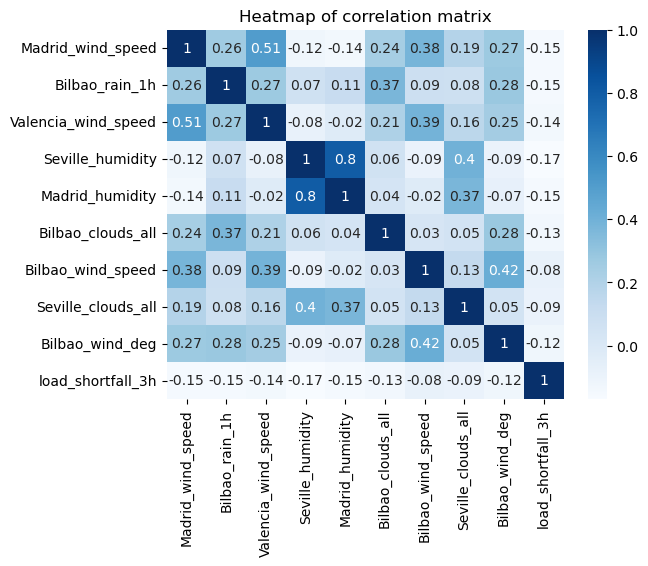

In [13]:
# Compute correlation matrix
corr = df_train[['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 
              'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'load_shortfall_3h']].corr().round(2)
# Creating multivariate visualization heatmap
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Heatmap of correlation matrix")
plt.show()

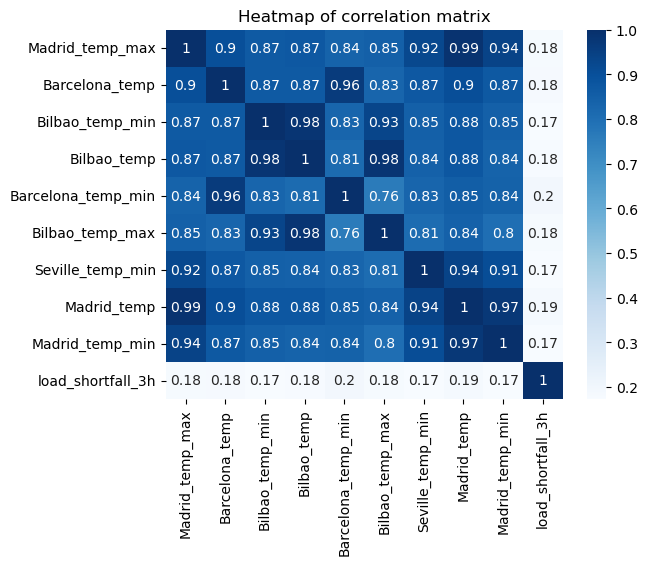

In [14]:
corr = df_train[['Madrid_temp_max', 'Barcelona_temp','Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
              'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']].corr()
# Creating multivariate visualization heatmap
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Heatmap of correlation matrix")
plt.show()

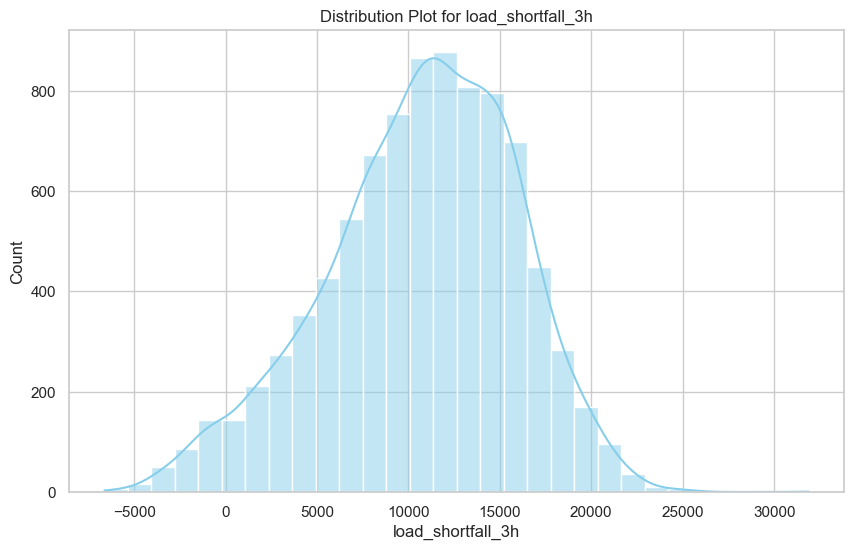

In [15]:
# Extracting the 'load_shortfall_3h' column
load_shortfall_data = df_train['load_shortfall_3h']

# Plotting a distribution plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(load_shortfall_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution Plot for load_shortfall_3h')
plt.xlabel('load_shortfall_3h')
plt.show()

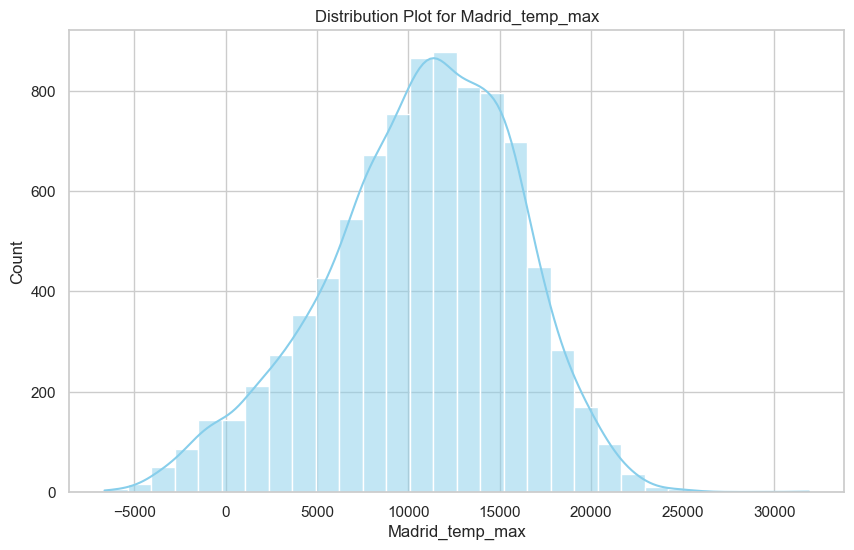

In [16]:
# Extracting the 'Madrid_temp_max' column
Madrid_temp_max_data = df_train['Madrid_temp_max']

# Plotting a distribution plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(load_shortfall_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution Plot for Madrid_temp_max')
plt.xlabel('Madrid_temp_max')
plt.show()

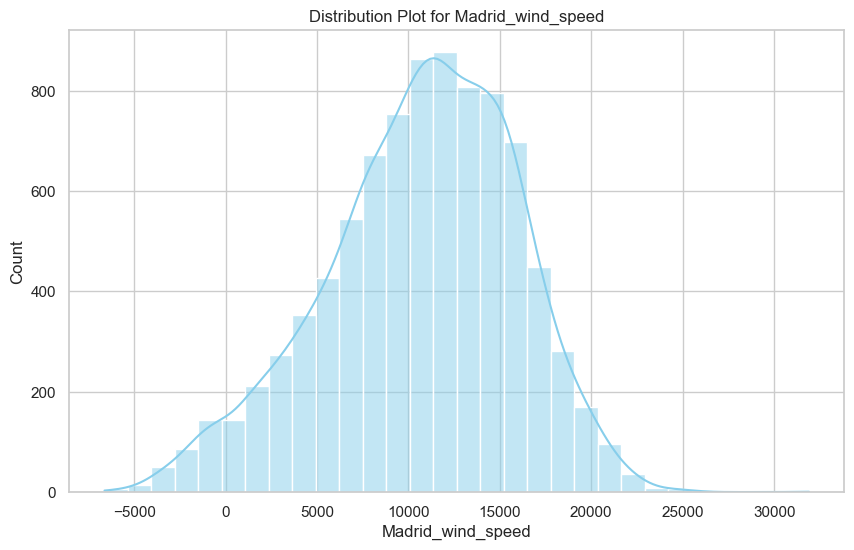

In [17]:
# Extracting the 'Madrid_wind_speed'  column
Madrid_temp_max_data = df_train['Madrid_wind_speed']

# Plotting a distribution plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(load_shortfall_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution Plot for Madrid_wind_speed')
plt.xlabel('Madrid_wind_speed')
plt.show()

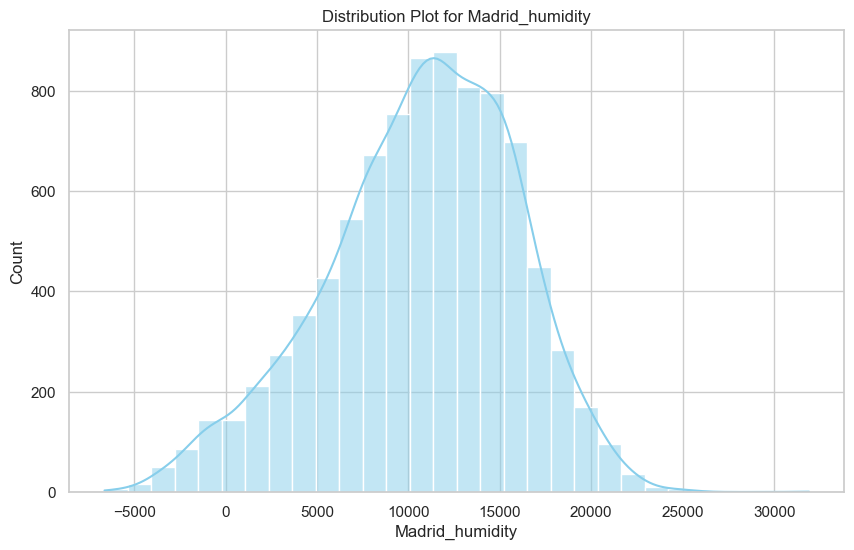

In [18]:
# Extracting the ''Madrid_humidity'' column
Madrid_temp_max_data = df_train['Madrid_humidity']

# Plotting a distribution plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(load_shortfall_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution Plot for Madrid_humidity')
plt.xlabel('Madrid_humidity')
plt.show()

C:\Users\bonan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


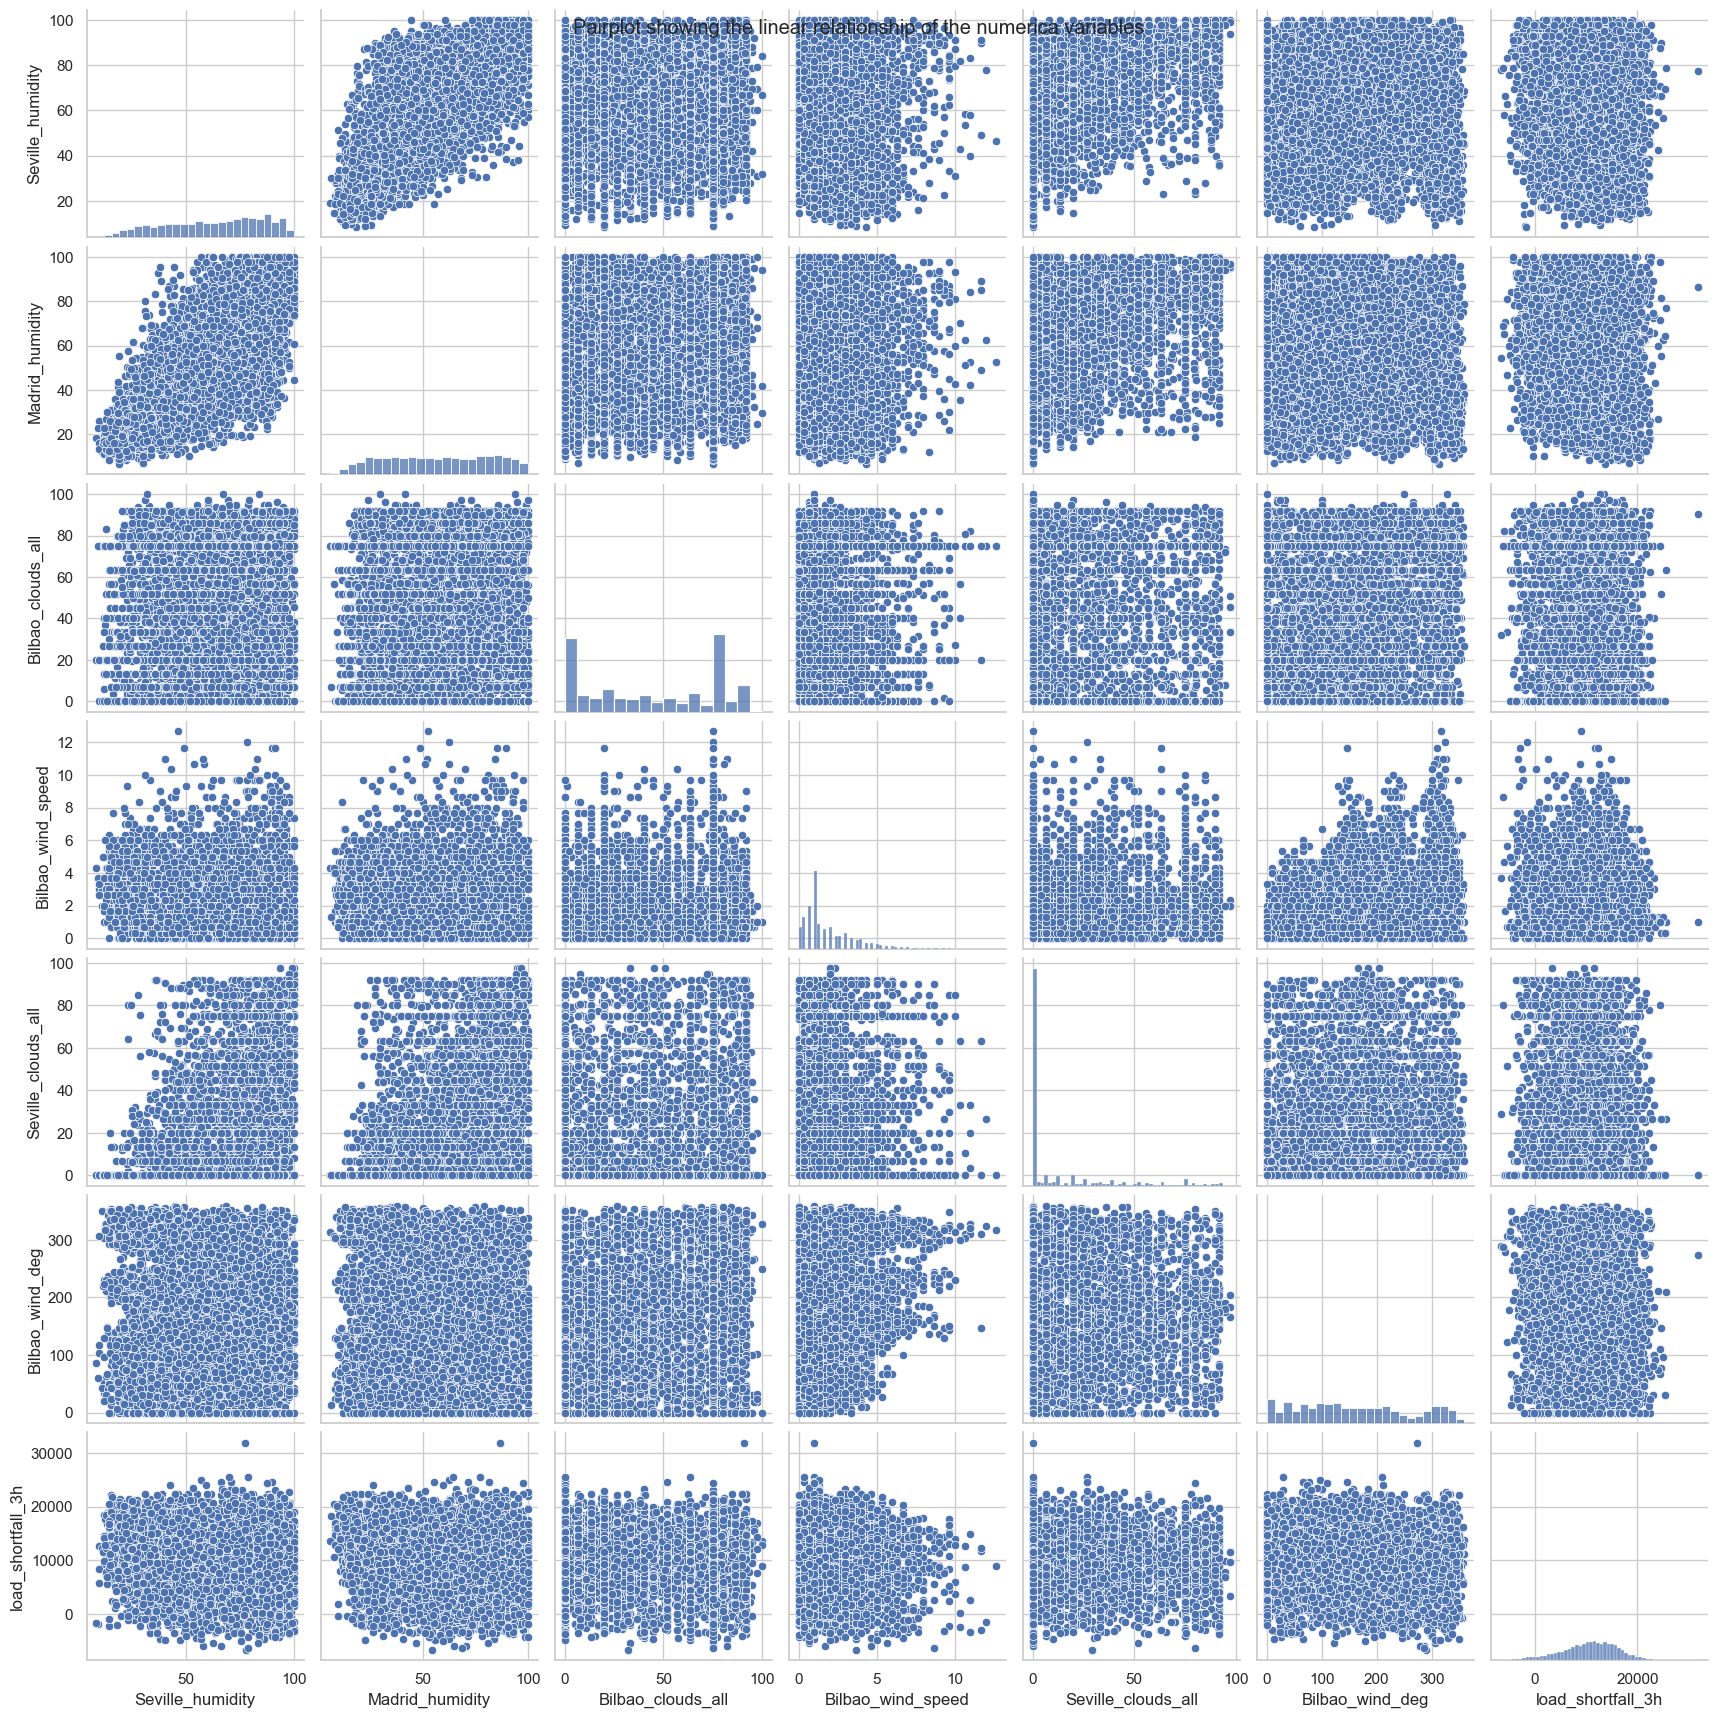

In [19]:
# Creating multivariate pairplot of the numerical variables in the dataset
sns.pairplot(data=df_train, vars=['Seville_humidity', 'Madrid_humidity', 
              'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'load_shortfall_3h'])
plt.suptitle("Pairplot showing the linear relationship of the numerica variables")
plt.show()

C:\Users\bonan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


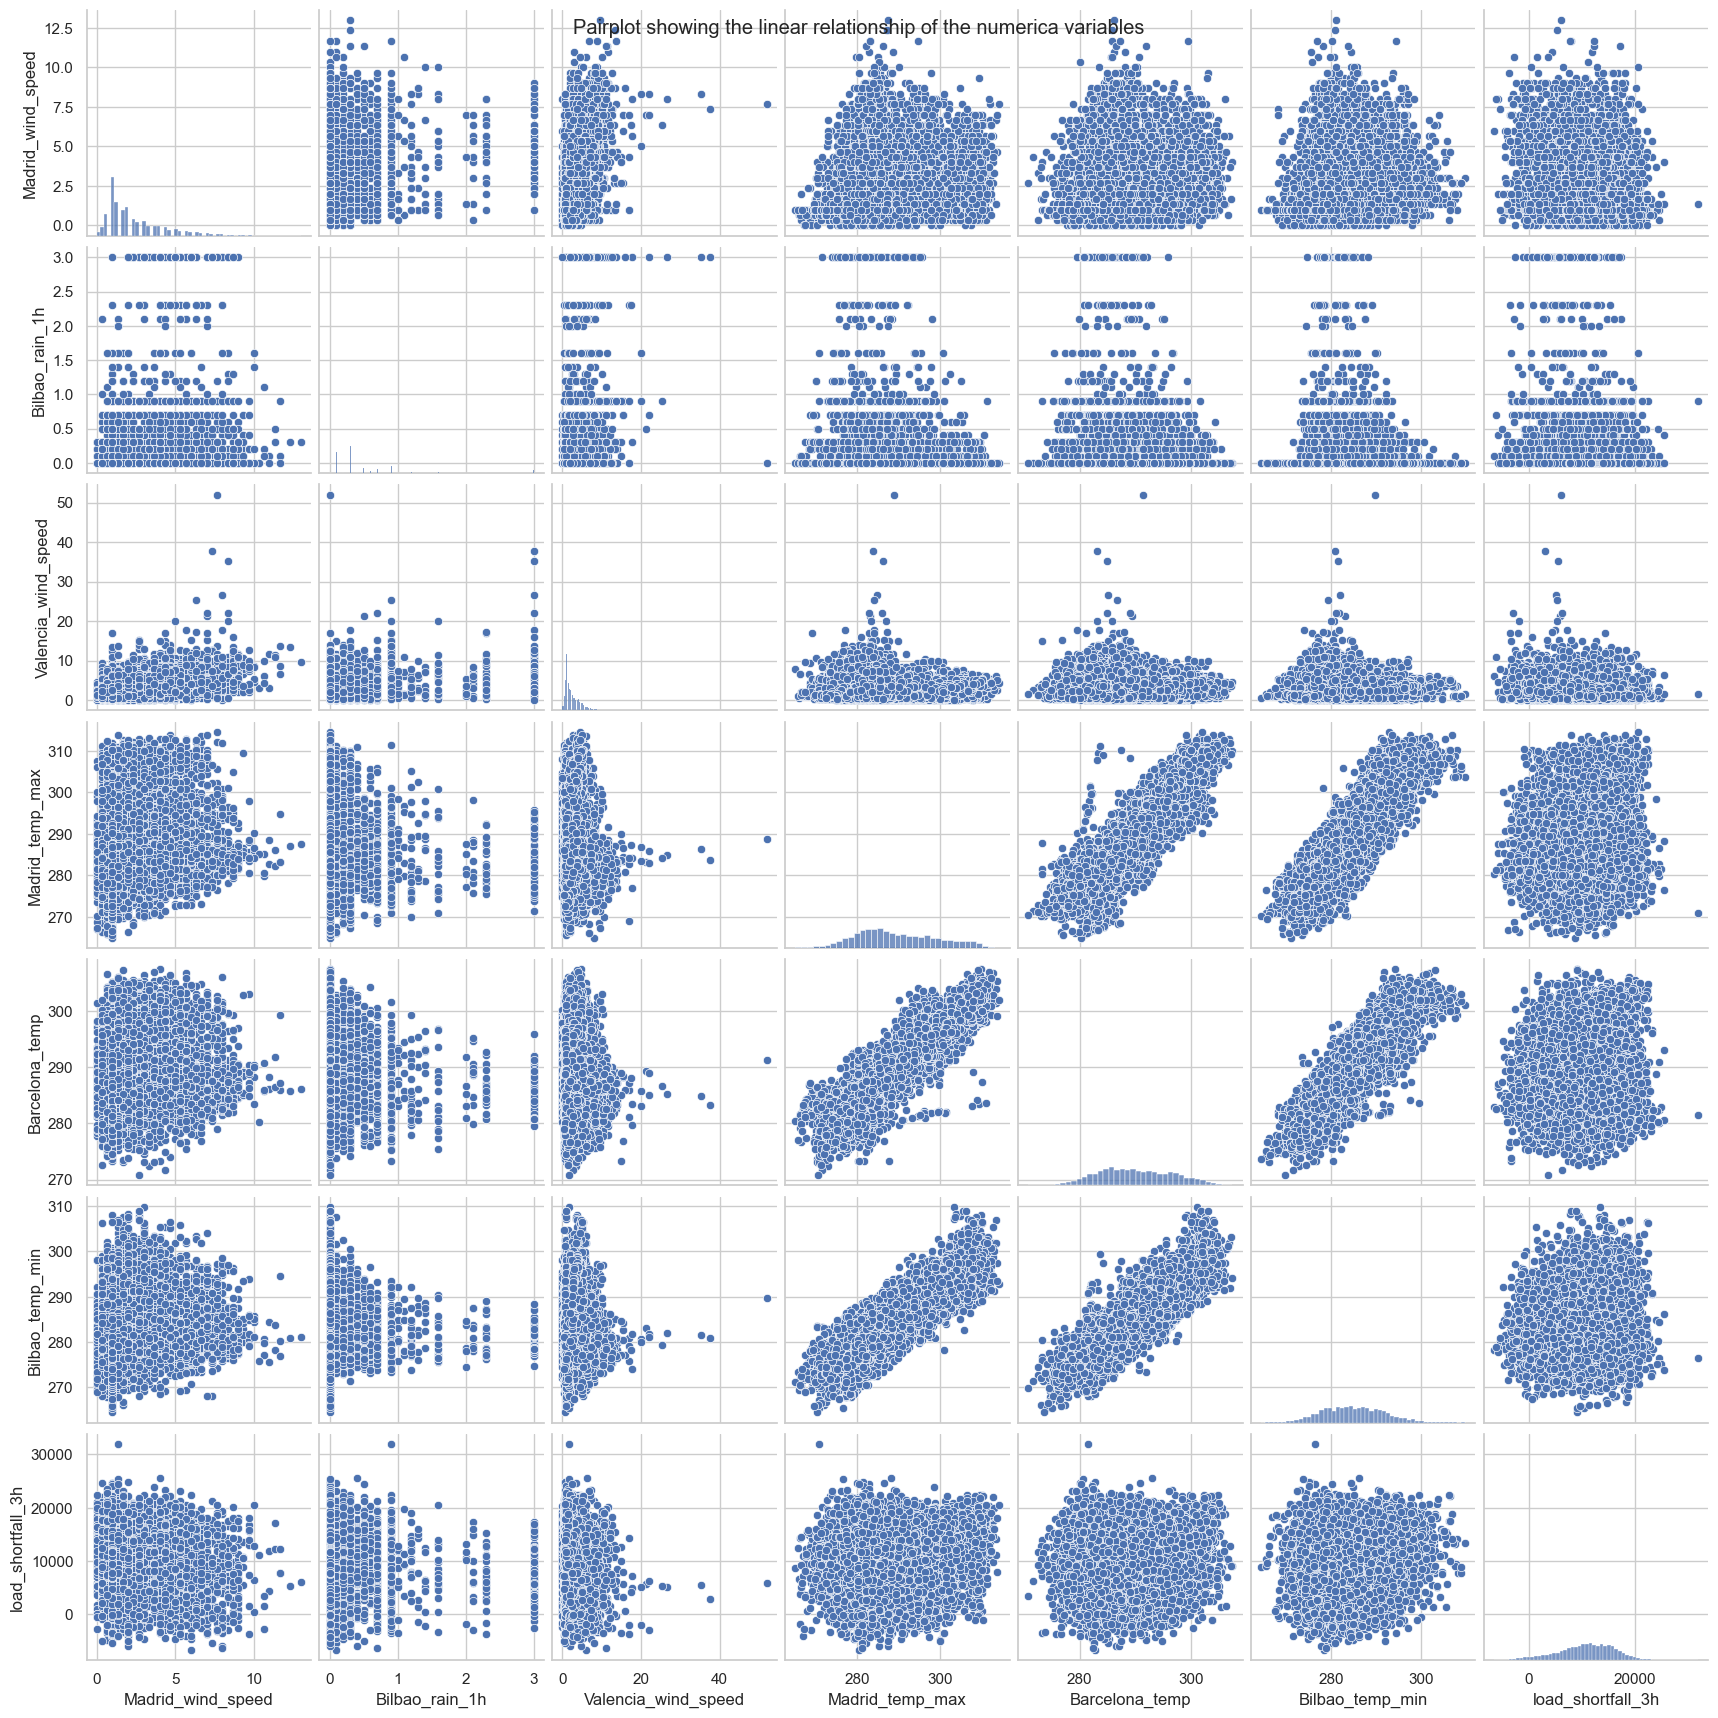

In [20]:
# Creating multivariate pairplot of the numerical variables in the dataset
sns.pairplot(data=df_train, vars=['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Madrid_temp_max', 
                            'Barcelona_temp','Bilbao_temp_min', 'load_shortfall_3h' ])
plt.suptitle("Pairplot showing the linear relationship of the numerica variables")
plt.show()

C:\Users\bonan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


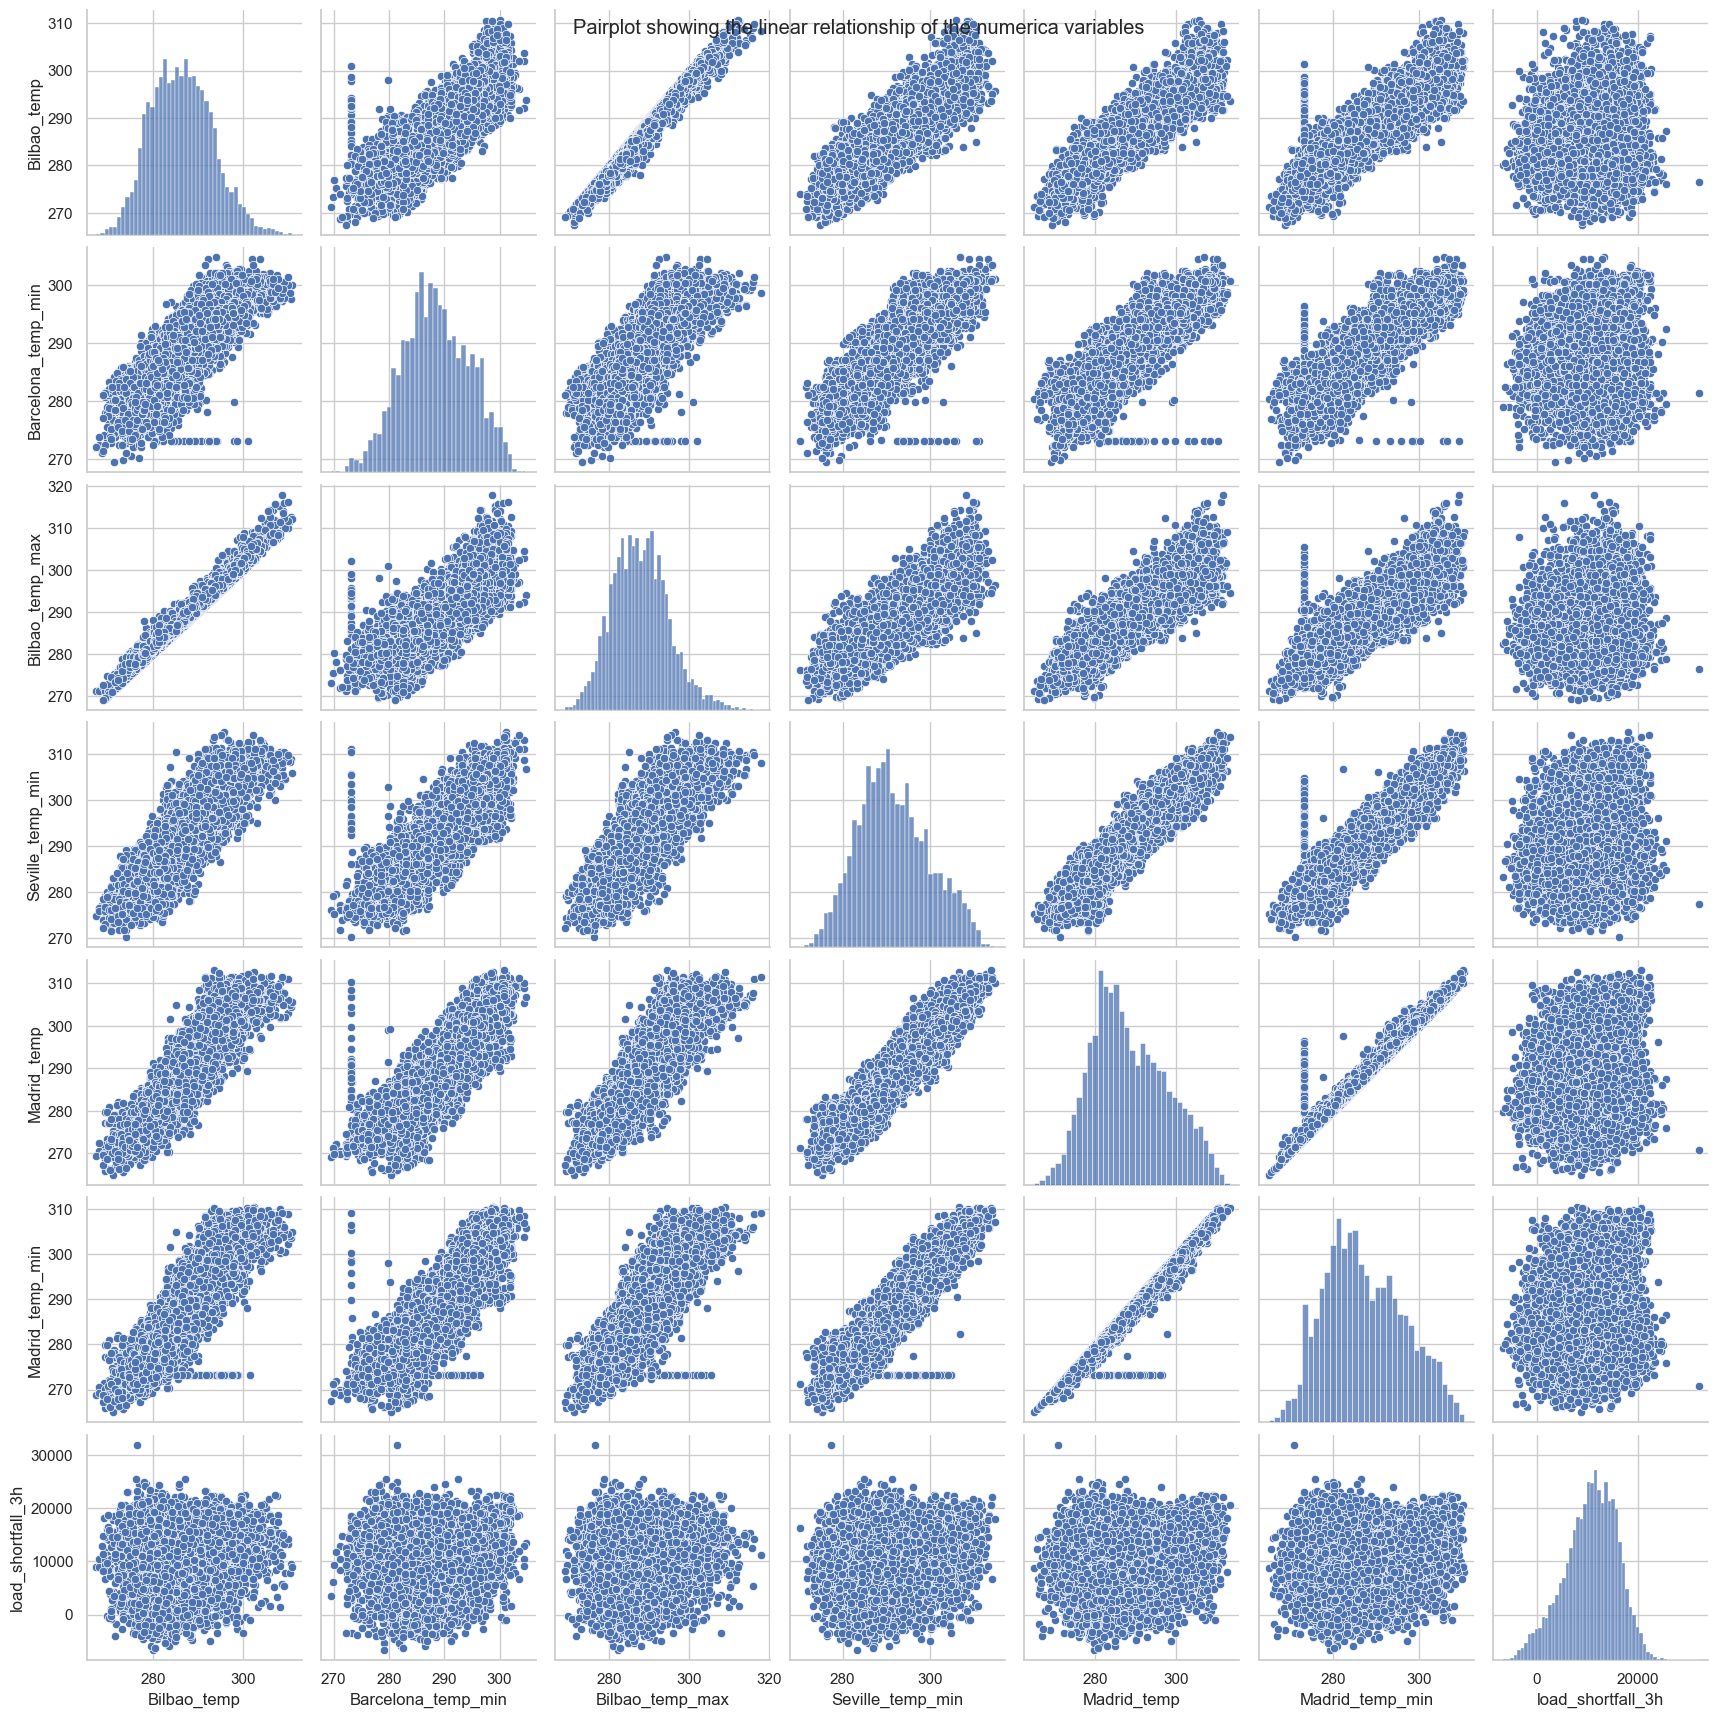

In [21]:
# Creating multivariate pairplot of the numerical variables in the dataset
sns.pairplot(data=df_train, vars=['Bilbao_temp', 'Barcelona_temp_min','Bilbao_temp_max', 'Seville_temp_min', 
                            'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'])
plt.suptitle("Pairplot showing the linear relationship of the numerica variables")
plt.show()

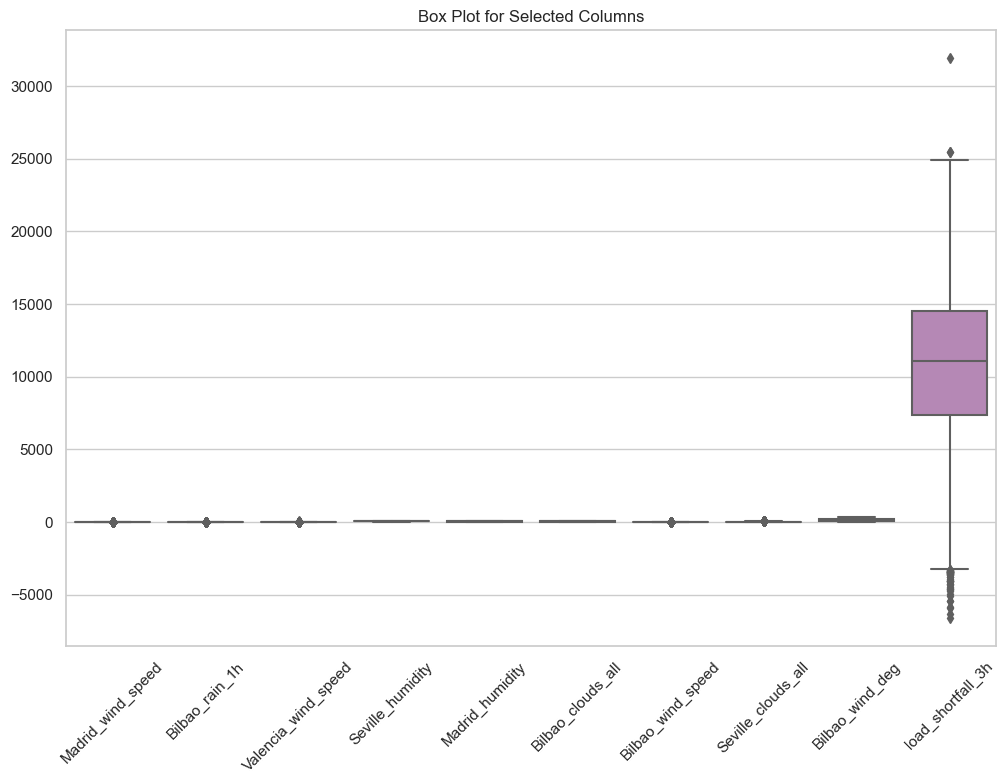

In [22]:
selected_columns = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
                    'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'load_shortfall_3h']

# Creating a new DataFrame with the selected columns
selected_data = df_train[selected_columns]

# Plotting a box plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=selected_data, palette="Set3")
plt.title('Box Plot for Selected Columns')
plt.xticks(rotation=45)
plt.show()

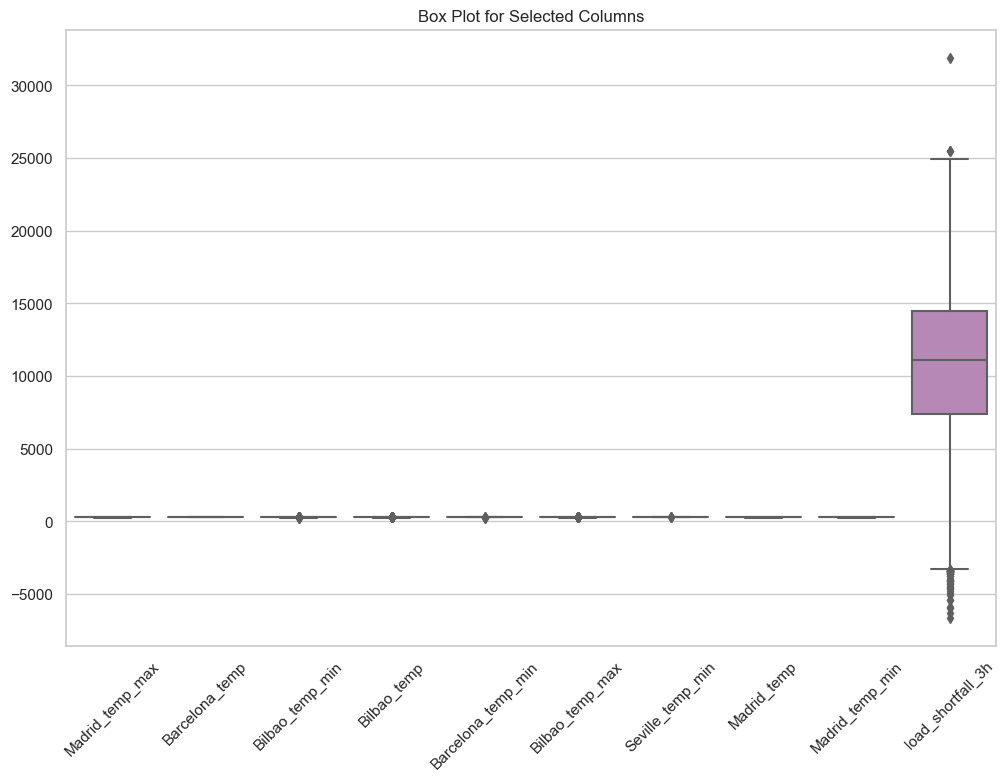

In [23]:
selected_columns = ['Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
                    'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']
 
# Creating a new DataFrame with the selected columns
selected_data = df_train[selected_columns]

# Plotting a box plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=selected_data, palette="Set3")
plt.title('Box Plot for Selected Columns')
plt.xticks(rotation=45)
plt.show()

In [24]:
# have a look at feature distributions

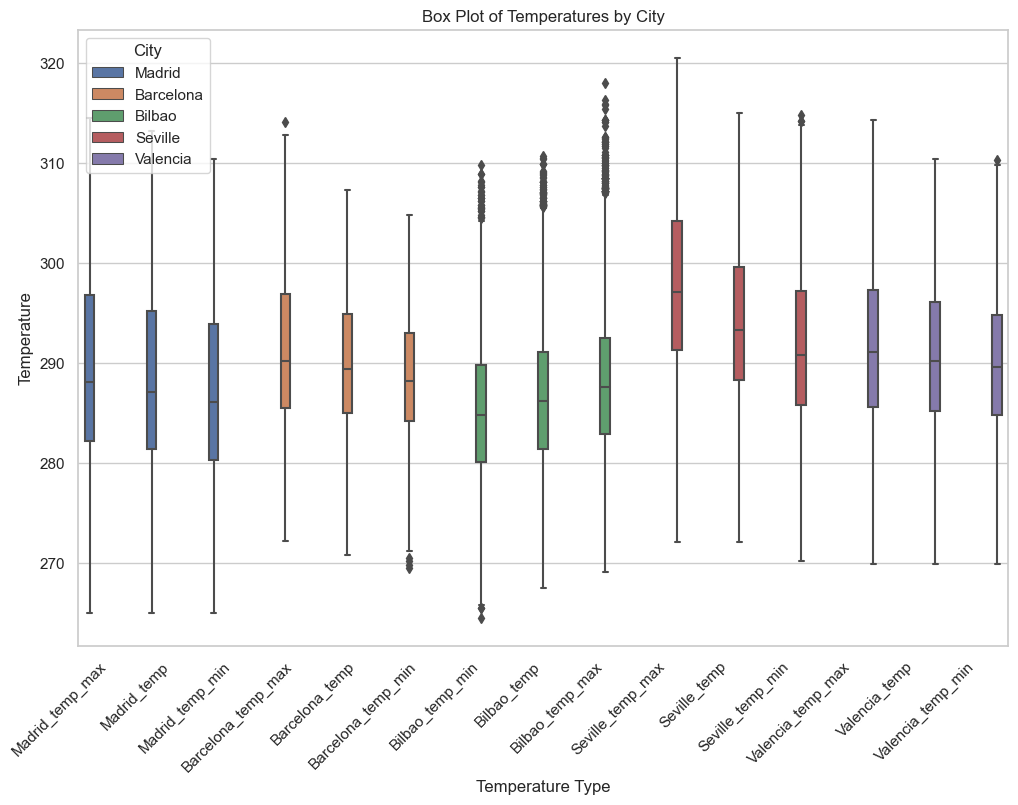

In [25]:
temperature_cols = ['Madrid_temp_max', 'Madrid_temp', 'Madrid_temp_min',
                    'Barcelona_temp_max', 'Barcelona_temp', 'Barcelona_temp_min',
                    'Bilbao_temp_min', 'Bilbao_temp', 'Bilbao_temp_max',
                    'Seville_temp_max', 'Seville_temp', 'Seville_temp_min',
                    'Valencia_temp_max', 'Valencia_temp', 'Valencia_temp_min']

# Create a new DataFrame with only temperature columns
temperature_df = temperature_df[temperature_cols]

# Melt the DataFrame to make it suitable for box plotting
melted_df = pd.melt(temperature_df)

# Extract city information from column names
melted_df['City'] = melted_df['variable'].apply(lambda x: x.split('_')[0])

# Create a box plot with color-coded temperatures
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='City', data=melted_df)
plt.title('Box Plot of Temperatures by City')
plt.xlabel('Temperature Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
temperature_df.skew()

Madrid_temp_max       0.298707
Madrid_temp           0.304123
Madrid_temp_min       0.275083
Barcelona_temp_max    0.276925
Barcelona_temp        0.128095
Barcelona_temp_min   -0.018057
Bilbao_temp_min       0.194912
Bilbao_temp           0.293686
Bilbao_temp_max       0.393932
Seville_temp_max     -0.033931
Seville_temp          0.157238
Seville_temp_min      0.265482
Valencia_temp_max     0.082672
Valencia_temp         0.057476
Valencia_temp_min     0.081832
dtype: float64

In [27]:
rain_df.skew()

Bilbao_snow_3h          26.177568
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Seville_weather_id      -3.275574
Bilbao_weather_id       -1.234844
dtype: float64

-Fairly skew distribution, therefore meddian can be used to merge all. 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [29]:
# modifying missing values/ features, replacing null values in Valencia_Pressure with the mode
# Create a copy of the DataFrame to avoid modifying the original DataFrame
df_clean= df_train.copy()

# Calculate the median for the 'Valencia_pressure' column
median_value = df_clean['Valencia_pressure'].median()

# Replace null values in 'Valencia_pressure' with the median value
df_clean['Valencia_pressure'].fillna(median_value, inplace=True)

In [30]:
# create new features

In [31]:
df_clean['time'] = pd.to_datetime(df_clean['time'])


# Extract year, month, day from 'Date'
df_clean['Year'] = df_clean['time'].dt.year
df_clean['Month'] = df_clean['time'].dt.month
df_clean['Day'] = df_clean['time'].dt.day
df_clean['Hour'] = df_clean['time'].dt.hour

#Extract season from month
#Define a function to get the season based on the month where 1 is spring, 2 is summer, 3 is autumn and 4 is winter
def season(month):
    if (month >= 3 and month <= 6):
        return 1
    elif (month >= 6 and month <= 9):
        return 2
    elif (month >= 9 and month <= 12):
        return 3
    else:
        return 4

# Apply the function to the 'Month' column to create a new 'Season' column
df_clean['Season'] = df_clean['Month'].apply(season)

In [32]:
# Select the relevant columns for each city
barcelona_cols = ['Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min']
bilbao_cols = ['Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min']
seville_cols = ['Seville_temp', 'Seville_temp_max', 'Seville_temp_min']
madrid_cols = ['Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min']
valencia_cols = ['Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min']

# Group by city and compute the row-wise average for each group
average_by_city = pd.DataFrame({
    'Barcelona_Avg_Temp': df_clean[barcelona_cols].mean(axis=1),
    'Bilbao_Avg_Temp': df_clean[bilbao_cols].mean(axis=1),
    'Seville_Avg_Temp': df_clean[seville_cols].mean(axis=1),
    'Madrid_Avg_Temp': df_clean[madrid_cols].mean(axis=1),
    'Valencia_Avg_Temp': df_clean[valencia_cols].mean(axis=1)
})

# Drop the original columns
df_clean.drop(columns=barcelona_cols + bilbao_cols + seville_cols + madrid_cols + valencia_cols, inplace=True)

# Concatenate the average columns with the original DataFrame
df_clean = pd.concat([df_clean, average_by_city], axis=1)

In [33]:
# engineer existing features

In [34]:
#Valencia_wind_deg
#Extract numerical values as strings from 
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

# Convert the extracted column from string to float
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].astype(float)

In [35]:
#Seville_pressure
#Extract numerical values as strings from 
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')

# Convert the extracted column from string to float
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].astype(float)

In [36]:
#Removing features
df_clean = df_clean.drop(['Unnamed: 0'], axis=1)
df_clean = df_clean.drop(['time'], axis=1)
df_clean = df_clean.drop(['Bilbao_weather_id'], axis=1)
df_clean = df_clean.drop(['Madrid_weather_id'], axis=1)
df_clean = df_clean.drop(['Barcelona_weather_id'], axis=1)
df_clean = df_clean.drop(['Seville_weather_id'], axis=1)

In [37]:
df_clean.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                5.0             0.0             0.666667   
1           0.333333               10.0             0.0             1.666667   
2           1.000000                9.0             0.0             1.000000   
3           1.000000                8.0             0.0             1.000000   
4           1.000000                7.0             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Year  Month  Day  Hour  Season  \
0                 0.0       223.333333  ...  2015      1    1     3       4   
1                 0.0       221.000000  ...  2015      1    1     6       4   
2                 0.0       214.333333  ...  2015      1    1     9       4   
3                 0.0       199.666667  ...  2015      1    1    12       4   
4                 0.0       185.000000  ...  2015      1    1    15       4   

   Barcelona_Avg_Temp  Bilbao_Avg_Temp  Seville_Avg_Temp  Madrid_Avg_Temp  \
0          281.013000       269.338615        274.254667       265.938000   
1          280.561667       270.376000        274.945000       266.386667   
2          281.583667       275.027229        278.792000       272.708667   
3          283.434104       281.135063        285.394000       281.895219   
4          284.213167       282.252063        285.513719       280.678437   

   Valencia_Avg_Temp  
0         269.888000  
1         271.728333  
2         278.008667  
3         284.899552  
4         283.015115  

[5 rows x 38 columns]

In [38]:
temperature_df.head()

Madrid_temp_max  Madrid_temp  Madrid_temp_min  Barcelona_temp_max  \
0       265.938000   265.938000       265.938000          281.013000   
1       266.386667   266.386667       266.386667          280.561667   
2       272.708667   272.708667       272.708667          281.583667   
3       281.895219   281.895219       281.895219          283.434104   
4       280.678437   280.678437       280.678437          284.213167   

   Barcelona_temp  Barcelona_temp_min  Bilbao_temp_min  Bilbao_temp  \
0      281.013000          281.013000       269.338615   269.338615   
1      280.561667          280.561667       270.376000   270.376000   
2      281.583667          281.583667       275.027229   275.027229   
3      283.434104          283.434104       281.135063   281.135063   
4      284.213167          284.213167       282.252063   282.252063   

   Bilbao_temp_max  Seville_temp_max  Seville_temp  Seville_temp_min  \
0       269.338615        274.254667    274.254667        274.254667   
1       270.376000        274.945000    274.945000        274.945000   
2       275.027229        278.792000    278.792000        278.792000   
3       281.135063        285.394000    285.394000        285.394000   
4       282.252063        285.513719    285.513719        285.513719   

   Valencia_temp_max  Valencia_temp  Valencia_temp_min  
0         269.888000     269.888000         269.888000  
1         271.728333     271.728333         271.728333  
2         278.008667     278.008667         278.008667  
3         284.899552     284.899552         284.899552  
4         283.015115     283.015115         283.015115

In [39]:
df_clean.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                5.0             0.0             0.666667   
1           0.333333               10.0             0.0             1.666667   
2           1.000000                9.0             0.0             1.000000   
3           1.000000                8.0             0.0             1.000000   
4           1.000000                7.0             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Year  Month  Day  Hour  Season  \
0                 0.0       223.333333  ...  2015      1    1     3       4   
1                 0.0       221.000000  ...  2015      1    1     6       4   
2                 0.0       214.333333  ...  2015      1    1     9       4   
3                 0.0       199.666667  ...  2015      1    1    12       4   
4                 0.0       185.000000  ...  2015      1    1    15       4   

   Barcelona_Avg_Temp  Bilbao_Avg_Temp  Seville_Avg_Temp  Madrid_Avg_Temp  \
0          281.013000       269.338615        274.254667       265.938000   
1          280.561667       270.376000        274.945000       266.386667   
2          281.583667       275.027229        278.792000       272.708667   
3          283.434104       281.135063        285.394000       281.895219   
4          284.213167       282.252063        285.513719       280.678437   

   Valencia_Avg_Temp  
0         269.888000  
1         271.728333  
2         278.008667  
3         284.899552  
4         283.015115  

[5 rows x 38 columns]

In [40]:
#Moving y to end of dataframe 
columns = df_clean.columns.tolist()

# Remove the 'load_shortfall_3h' column from the list
columns.remove('load_shortfall_3h')

# Add it to the end of the list
columns.append('load_shortfall_3h')

# Reorder the DataFrame with the new column order
df_clean = df_clean[columns]

In [41]:
#Handling highly skewed data in bilbao_snow_3hr
df_clean['Bilbao_snow_3h'] = np.log1p( df_clean['Bilbao_snow_3h'])
df_clean['Valencia_snow_3h'] = np.log1p( df_clean['Valencia_snow_3h'])
df_clean['Bilbao_rain_1h'] = np.log1p( df_clean['Bilbao_rain_1h'])
df_clean['Barcelona_rain_1h'] = np.log1p( df_clean['Barcelona_rain_1h'])
df_clean['Seville_rain_1h'] = np.log1p( df_clean['Seville_rain_1h'])
df_clean['Madrid_rain_1h'] = np.log1p( df_clean['Madrid_rain_1h'])
df_clean['Barcelona_rain_3h'] = np.log1p( df_clean['Barcelona_rain_3h'])
df_clean['Seville_rain_3h'] = np.log1p( df_clean['Seville_rain_3h'])


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   float64
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

# Clean test data

In [43]:
# modifying missing values/ features, replacing null values in Valencia_Pressure with the mode
# Create a copy of the DataFrame to avoid modifying the original DataFrame
df_clean_test= df_test.copy()

# Calculate the median for the 'Valencia_pressure' column
median_value = df_clean_test['Valencia_pressure'].median()

# Replace null values in 'Valencia_pressure' with the median value
df_clean_test['Valencia_pressure'].fillna(median_value, inplace=True)

In [44]:
df_clean_test['time'] = pd.to_datetime(df_clean_test['time'])


# Extract year, month, day from 'Date'
df_clean_test['Year'] = df_clean_test['time'].dt.year
df_clean_test['Month'] = df_clean_test['time'].dt.month
df_clean_test['Day'] = df_clean_test['time'].dt.day
df_clean_test['Hour'] = df_clean_test['time'].dt.hour

#Extract season from month
#Define a function to get the season based on the month where 1 is spring, 2 is summer, 3 is autumn and 4 is winter
def season(month):
    if (month >= 3 and month <= 6):
        return 1
    elif (month >= 6 and month <= 9):
        return 2
    elif (month >= 9 and month <= 12):
        return 3
    else:
        return 4

# Apply the function to the 'Month' column to create a new 'Season' column
df_clean_test['Season'] = df_clean_test['Month'].apply(season)

In [45]:
# Select the relevant columns for each city
barcelona_cols = ['Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min']
bilbao_cols = ['Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min']
seville_cols = ['Seville_temp', 'Seville_temp_max', 'Seville_temp_min']
madrid_cols = ['Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min']
valencia_cols = ['Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min']

# Group by city and compute the row-wise average for each group
average_by_city = pd.DataFrame({
    'Barcelona_Avg_Temp': df_clean_test[barcelona_cols].mean(axis=1),
    'Bilbao_Avg_Temp': df_clean_test[bilbao_cols].mean(axis=1),
    'Seville_Avg_Temp': df_clean_test[seville_cols].mean(axis=1),
    'Madrid_Avg_Temp': df_clean_test[madrid_cols].mean(axis=1),
    'Valencia_Avg_Temp': df_clean_test[valencia_cols].mean(axis=1)
})

# Drop the original columns
df_clean_test.drop(columns=barcelona_cols + bilbao_cols + seville_cols + madrid_cols + valencia_cols, inplace=True)

# Concatenate the average columns with the original DataFrame
df_clean_test = pd.concat([df_clean_test, average_by_city], axis=1)

In [46]:
#Valencia_wind_deg
#Extract numerical values as strings from 
df_clean_test['Valencia_wind_deg'] = df_clean_test['Valencia_wind_deg'].str.extract('(\d+)')

# Convert the extracted column from string to float
df_clean_test['Valencia_wind_deg'] = df_clean_test['Valencia_wind_deg'].astype(float)

In [47]:
#Seville_pressure
#Extract numerical values as strings from 
df_clean_test['Seville_pressure'] = df_clean_test['Seville_pressure'].str.extract('(\d+)')

# Convert the extracted column from string to float
df_clean_test['Seville_pressure'] = df_clean_test['Seville_pressure'].astype(float)

In [48]:
#Removing features
df_clean_test = df_clean_test.drop(['Unnamed: 0'], axis=1)
df_clean_test = df_clean_test.drop(['time'], axis=1)
df_clean_test = df_clean_test.drop(['Bilbao_weather_id'], axis=1)
df_clean_test = df_clean_test.drop(['Madrid_weather_id'], axis=1)
df_clean_test = df_clean_test.drop(['Barcelona_weather_id'], axis=1)
df_clean_test = df_clean_test.drop(['Seville_weather_id'], axis=1)

In [49]:
#Handling highly skewed data in bilbao_snow_3hr
df_clean_test['Bilbao_snow_3h'] = np.log1p( df_clean_test['Bilbao_snow_3h'])
df_clean_test['Valencia_snow_3h'] = np.log1p( df_clean_test['Valencia_snow_3h'])
df_clean_test['Bilbao_rain_1h'] = np.log1p( df_clean_test['Bilbao_rain_1h'])
df_clean_test['Barcelona_rain_1h'] = np.log1p( df_clean_test['Barcelona_rain_1h'])
df_clean_test['Seville_rain_1h'] = np.log1p( df_clean_test['Seville_rain_1h'])
df_clean_test['Madrid_rain_1h'] = np.log1p( df_clean_test['Madrid_rain_1h'])
df_clean_test['Barcelona_rain_3h'] = np.log1p( df_clean_test['Barcelona_rain_3h'])
df_clean_test['Seville_rain_3h'] = np.log1p( df_clean_test['Seville_rain_3h'])


In [50]:
df_clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     2920 non-null   float64
 1   Valencia_wind_deg     2920 non-null   float64
 2   Bilbao_rain_1h        2920 non-null   float64
 3   Valencia_wind_speed   2920 non-null   float64
 4   Seville_humidity      2920 non-null   float64
 5   Madrid_humidity       2920 non-null   float64
 6   Bilbao_clouds_all     2920 non-null   float64
 7   Bilbao_wind_speed     2920 non-null   float64
 8   Seville_clouds_all    2920 non-null   float64
 9   Bilbao_wind_deg       2920 non-null   float64
 10  Barcelona_wind_speed  2920 non-null   float64
 11  Barcelona_wind_deg    2920 non-null   float64
 12  Madrid_clouds_all     2920 non-null   float64
 13  Seville_wind_speed    2920 non-null   float64
 14  Barcelona_rain_1h     2920 non-null   float64
 15  Seville_pressure     

In [173]:
#Standardising the data becuase the features are in different units 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_test)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


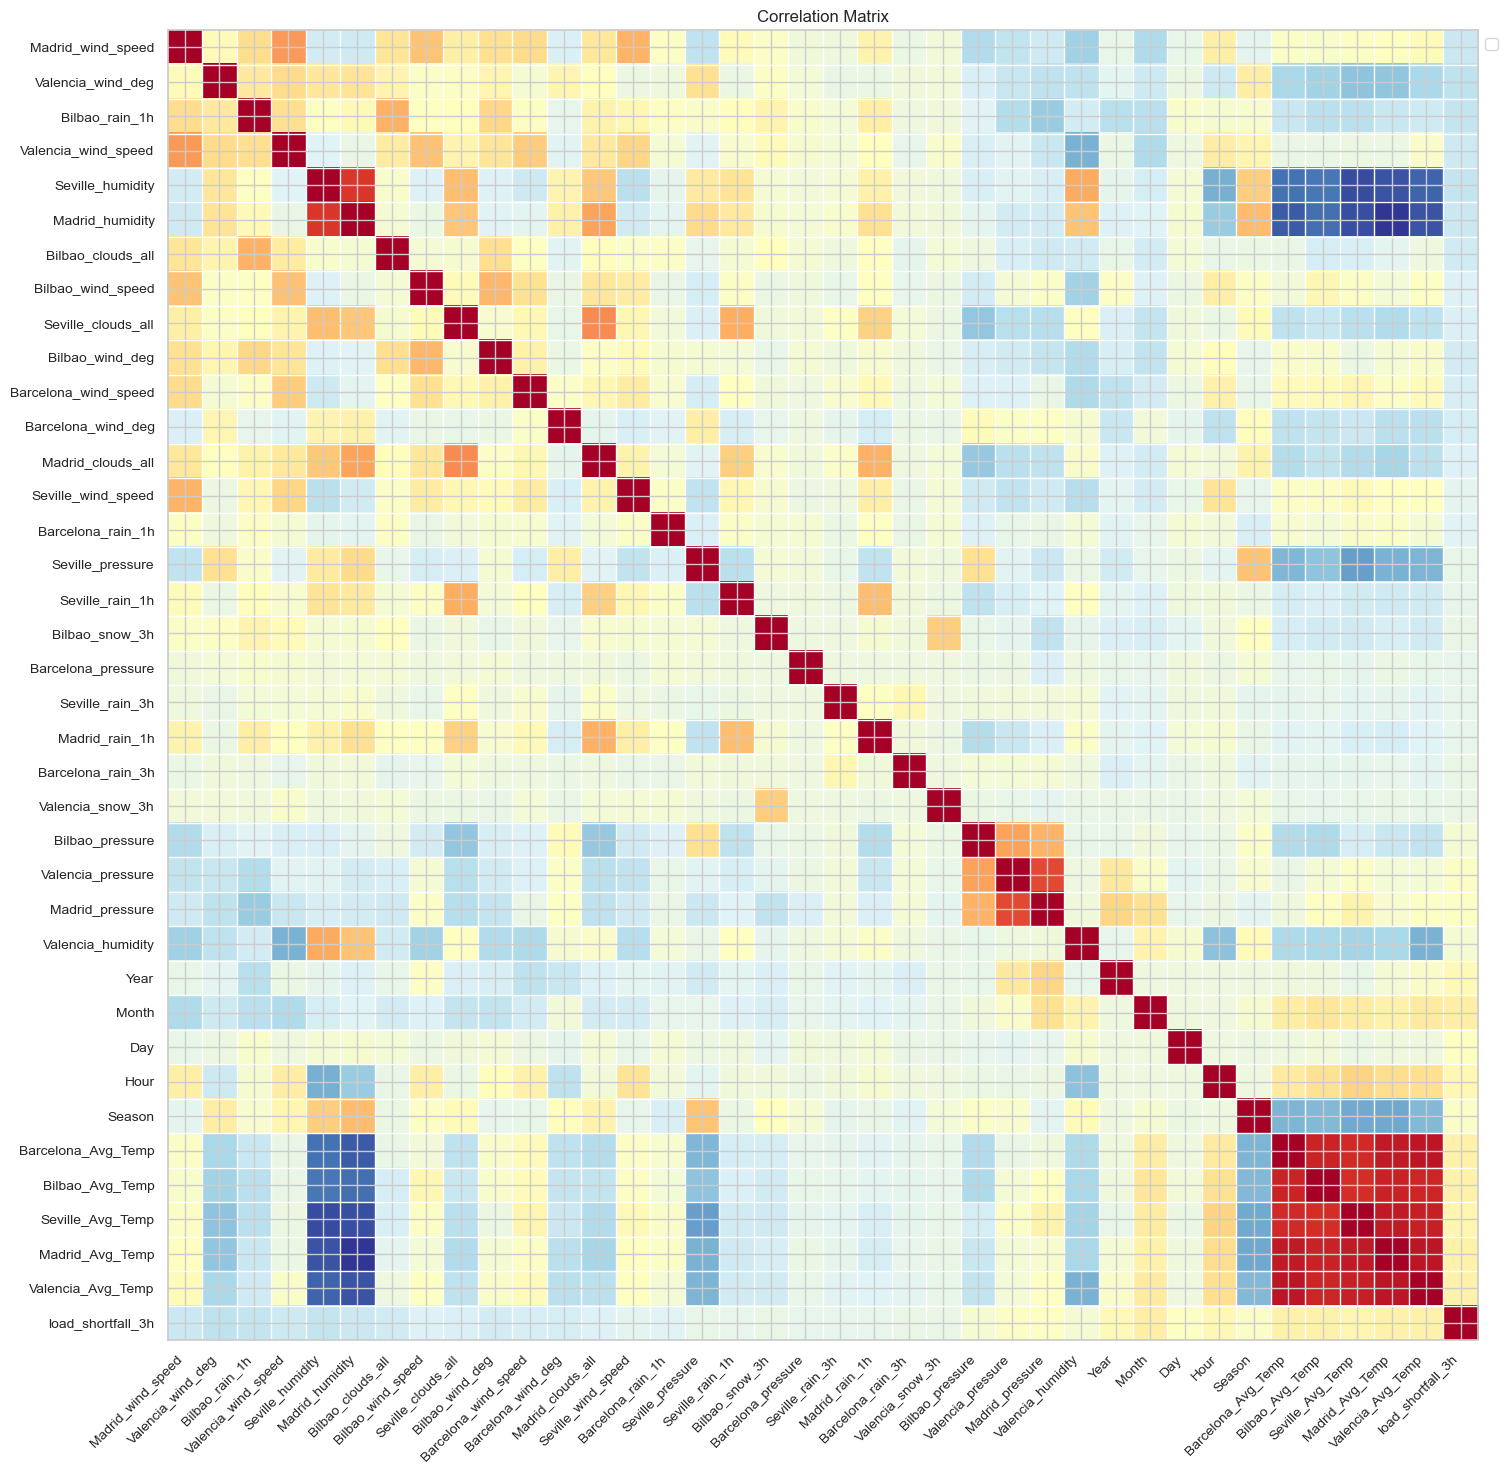

In [174]:
# Heat map plot after cleaning the dataset
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_clean.corr(), xnames = df_clean.corr().columns, ax = ax);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [176]:
# split data
X= df_clean[:len(df_clean)].drop('load_shortfall_3h',axis=1)
y = df_clean[:len(df_clean)][['load_shortfall_3h']]


In [177]:
y = np.array(y).ravel()

In [178]:
#Standardising the data becuase the features are in different units 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()


In [180]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [181]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.20, random_state=1)

# create one or more ML models

### RANDOM FOREST MODEL 1

In [184]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)

# Fit the model to your training data
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [185]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [186]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and RMSE for the training set
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# Calculate MSE and RMSE for the test set
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [187]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2, rf_train_rmse, rf_test_rmse ]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Training RMSE', 'Test RMSE']
rf_results

Method    Training MSE Training R2        Test MSE   Test R2  \
0  Random forest  1447198.197178    0.947088  9107896.148954  0.659153   

  Training RMSE    Test RMSE  
0    1202.99551  3017.929116

In [188]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                      Importance
Day                     0.187837
Hour                    0.117037
Month                   0.093199
Year                    0.045348
Bilbao_pressure         0.037846
Madrid_wind_speed       0.036330
Barcelona_pressure      0.034583
Valencia_humidity       0.027654
Barcelona_Avg_Temp      0.026458
Valencia_wind_speed     0.025601
Bilbao_Avg_Temp         0.025032
Valencia_Avg_Temp       0.025013
Bilbao_wind_deg         0.023532
Barcelona_wind_deg      0.023241
Bilbao_wind_speed       0.023052
Madrid_humidity         0.023025
Madrid_Avg_Temp         0.022829
Seville_humidity        0.022697
Seville_Avg_Temp        0.021945
Madrid_pressure         0.017796
Barcelona_wind_speed    0.016808
Seville_wind_speed      0.016773
Seville_pressure        0.016675
Valencia_pressure       0.015318
Valencia_wind_deg       0.015271
Bilbao_clouds_all       0.014587
Madrid_clouds_all       0.011055
Seville_clouds_all      0.009981
Bilbao_rain_1h          0.006164
Barcelona_

### LINEAR REGRESSION MODEL 2

In [189]:
lr = LinearRegression()

In [190]:
lr.fit(X_train, y_train)

LinearRegression()

In [191]:
# Applying the model to make a prediction
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [192]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [193]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2, lr_train_rmse, lr_test_rmse]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Training RMSE', 'Test RMSE']
lr_results

Method     Training MSE Training R2         Test MSE   Test R2  \
0  Linear regression  22483223.738178    0.177968  21789720.906687  0.184558   

  Training RMSE    Test RMSE  
0   4741.647787  4667.946112

### DECISION TREE MODEL 3

In [194]:
dt = DecisionTreeRegressor(max_depth=2, random_state=100)

In [195]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=100)

In [196]:
y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

In [197]:
from sklearn.metrics import mean_squared_error, r2_score

dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_rmse = np.sqrt(dt_train_mse)
dt_train_r2 = r2_score(y_train, y_dt_train_pred)

dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_rmse = np.sqrt(dt_test_mse)
dt_test_r2 = r2_score(y_test, y_dt_test_pred)


In [198]:
dt_results = pd.DataFrame(['Decision tree', dt_train_mse, dt_train_r2, dt_test_mse, dt_test_r2, dt_train_rmse, 
                           dt_test_rmse]).transpose()
dt_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Training RMSE', 'Test RMSE',]
dt_results

Method     Training MSE Training R2         Test MSE  Test R2  \
0  Decision tree  23241936.708461    0.150228  22665306.356132  0.15179   

  Training RMSE    Test RMSE  
0   4820.989184  4760.809422

### RIDGE REGRESSOR MODEL 4

In [199]:
from sklearn.linear_model import Ridge

In [200]:
rg = Ridge(alpha=0.2)

In [201]:
rg.fit(X_train,y_train)

Ridge(alpha=0.2)

In [202]:
y_rg_train_pred = rg.predict(X_train)
y_rg_test_pred = rg.predict(X_test)

In [203]:
from sklearn.metrics import mean_squared_error, r2_score

rg_train_mse = mean_squared_error(y_train, y_rg_train_pred)
rg_train_rmse = np.sqrt(rg_train_mse)
rg_train_r2 = r2_score(y_train, y_rg_train_pred)

rg_test_mse = mean_squared_error(y_test, y_rg_test_pred)
rg_test_rmse = np.sqrt(rg_test_mse)
rg_test_r2 = r2_score(y_test, y_rg_test_pred)

In [204]:
rg_results = pd.DataFrame(['Ridge', rg_train_mse, rg_train_r2, rg_test_mse, rg_test_r2, rg_train_rmse, 
                           rg_test_rmse ]).transpose()
rg_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Training RMSE', 'Test RMSE']
rg_results

Method     Training MSE Training R2         Test MSE   Test R2  \
0  Ridge  22483471.625835    0.177959  21791294.221561  0.184499   

  Training RMSE    Test RMSE  
0   4741.673927  4668.114632

### LASSO REGRESSOR MODEL 5

In [205]:
from sklearn.linear_model import Lasso,LassoCV

In [206]:
las = Lasso(alpha=1)
las.fit(X_train,y_train)

Lasso(alpha=1)

In [207]:
y_las_train_pred = las.predict(X_train)
y_las_test_pred = las.predict(X_test)

In [208]:
from sklearn.metrics import mean_squared_error, r2_score

las_train_mse = mean_squared_error(y_train, y_las_train_pred)
las_train_rmse = np.sqrt(las_train_mse)
las_train_r2 = r2_score(y_train, y_las_train_pred)

las_test_mse = mean_squared_error(y_test, y_las_test_pred)
las_test_rmse = np.sqrt(las_test_mse)
las_test_r2 = r2_score(y_test, y_las_test_pred)

In [209]:
las_results = pd.DataFrame(['Lasso', las_train_mse, las_train_r2, las_test_mse, las_test_r2, las_train_rmse, 
                            las_test_rmse]).transpose()
las_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Training RMSE', 'Test RMSE']
las_results

Method     Training MSE Training R2         Test MSE  Test R2 Training RMSE  \
0  Lasso  22496677.232173    0.177476  21823867.451543  0.18328   4743.066227   

     Test RMSE  
0  4671.602236

In [210]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [211]:
# Compare model performance

In [212]:
df_models = pd.concat([lr_results, rf_results, dt_results, las_results, rg_results], axis=0)

In [213]:
df_models.reset_index(drop=True)

Method     Training MSE Training R2         Test MSE   Test R2  \
0  Linear regression  22483223.738178    0.177968  21789720.906687  0.184558   
1      Random forest   1447198.197178    0.947088   9107896.148954  0.659153   
2      Decision tree  23241936.708461    0.150228  22665306.356132   0.15179   
3              Lasso  22496677.232173    0.177476  21823867.451543   0.18328   
4              Ridge  22483471.625835    0.177959  21791294.221561  0.184499   

  Training RMSE    Test RMSE  
0   4741.647787  4667.946112  
1    1202.99551  3017.929116  
2   4820.989184  4760.809422  
3   4743.066227  4671.602236  
4   4741.673927  4668.114632

In [214]:
from sklearn import metrics

In [218]:
#Test data(unseen form)
x_train = df_clean[:len(df_clean)].drop('load_shortfall_3h',axis=1)
x_test = df_clean_test

In [219]:
rf.fit(x_train,y)
preds_final = rf.predict(x_test)

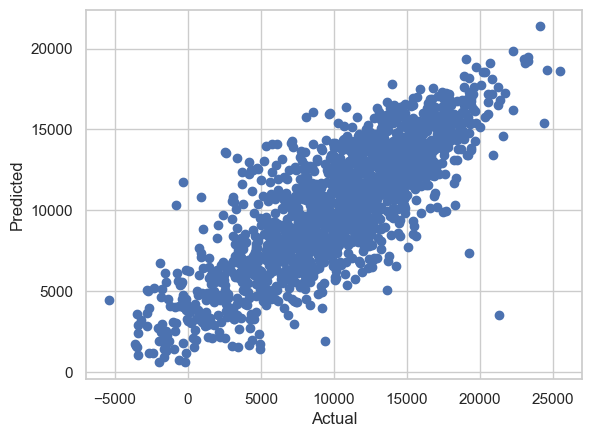

In [220]:
# Scatter plot showing the predicted and the actual value
plt.scatter(y_test,y_rf_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

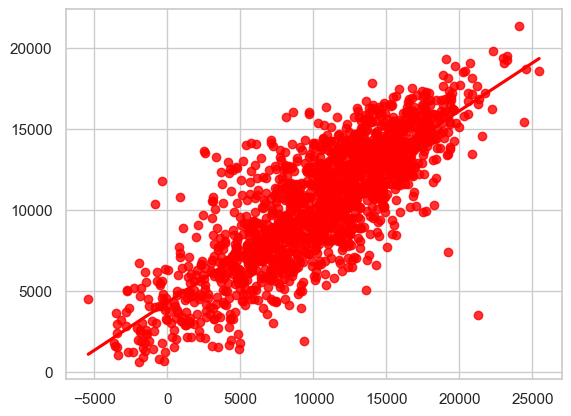

In [221]:
#Regression plot of model#
sns.regplot(x=y_test,y=y_rf_test_pred,ci=None,color ='red');
#to know the different between the predicted value and actual value#
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_rf_test_pred,'Difference':y_test-y_rf_test_pred})

In [222]:
daf = pd.DataFrame(preds_final, columns = ['load_shortfall_3h'])
daf.head()

load_shortfall_3h
0        9827.655000
1        8576.466667
2        7572.913333
3       10061.096667
4       11388.938056

## Submisssion

In [223]:
output = pd.DataFrame({"time": df_test['time']})
submission = output.join(daf)
submission.to_csv("submission-random_forrest.csv", index = False)
submission

time  load_shortfall_3h
0     2018-01-01 00:00:00        9827.655000
1     2018-01-01 03:00:00        8576.466667
2     2018-01-01 06:00:00        7572.913333
3     2018-01-01 09:00:00       10061.096667
4     2018-01-01 12:00:00       11388.938056
...                   ...                ...
2915  2018-12-31 09:00:00       14484.797500
2916  2018-12-31 12:00:00       12921.648076
2917  2018-12-31 15:00:00       11958.212939
2918  2018-12-31 18:00:00       13740.238241
2919  2018-12-31 21:00:00       15370.180957

[2920 rows x 2 columns]

In [224]:
# Choose best model and motivate why it is the best choice

'''The best model from modeling is random forest because it gave the highest R-squared score, also known as the coefficient 
of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is 
predictable from the independent variables in a regression model. In other words, it quantifies the goodness of fit of the
model. It also gave the least Root Mean Squared Error. It is a commonly used metric for evaluating the 
performance of a regression model. RMSE measures the average magnitude of the errors between predicted values and
actual values.'''


 

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [225]:
# discuss chosen methods logic
'''Random Forest Overview:
A Random Forest is like a "forest" of decision trees. Each decision tree is smart trees who's really good at
making decisions based on certain information.

Decision Trees:
Analogy: Considering decision trees as a series of questions. For example, if you're deciding whether to go outside, the first
question might be "Is it raining?" If yes, then "Do you have an umbrella?"

In Model Terms: Decision trees in a Random Forest are like smart decision-makers, each specializing in a different aspect of 
the problem. They make predictions based on certain features or characteristics.

Randomness:
Analogy: Random Forest is like many friends, each making their own decision about going outside. Some friends might 
consider if it's sunny, others if it's windy, and so on.

In Model Terms: Random Forest introduces randomness by training each decision tree on a random subset of the data and allowing 
them to focus on different aspects. This diversity helps prevent overfitting and makes the overall prediction more robust.

Voting:
Analogy: Make a decision based on the majority opinion.

In Model Terms: Random Forest combines the predictions of all its decision trees. Each tree "votes" on the outcome, and the
most popular prediction becomes the final result.

Ensemble Learning:
Analogy: Think of a choir where each singer might have their strengths and weaknesses, but together they create a beautiful
harmony.

In Model Terms: Random Forest is an ensemble of decision trees. Each tree contributes its own understanding, and when combined,
they create a more robust and accurate prediction.

Strengths:
Analogy: It's like having a group of experts with different specialties. If one expert is not sure about something, others might
have a clearer view.

In Model Terms: Random Forest is good at handling complex relationships in data and tends to generalize well to new, unseen 
data.
    

In summary, Random Forest is a team of decision-makers, each specializing in different aspects, and by working together, they 
make more accurate and reliable predictions. The randomness and diversity within the team contribute to the model's ability to 
handle various situations.'''

